In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Geographic Data with Basemap
# <font color = red> SKIP THIS SECTION </font>

# Visualization with Seaborn

* Matplotlib's complains
    1. Matplotlib’s API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
    2. Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

* Seaborn
    1. Provides and API on top of Matplotlib that offers same choices for plot style and color defaults, 
    2. defines simple high-level functions for common statistical plot types.
    3. integrates with the functionality provided by Pandas DataFrames
    
## Seaborn Versus Matplotlib


In [7]:
mpl.__version__

'2.1.2'

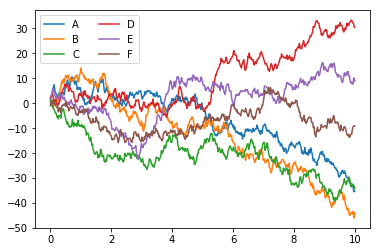

In [4]:
# create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [7]:
# set the style by calling Seaborn's set()
sns.set()

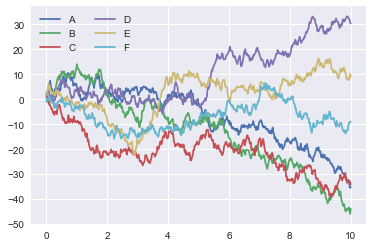

In [8]:
# same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots
* Seaborn's main idea: it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

### Histograms, KDE, and densities



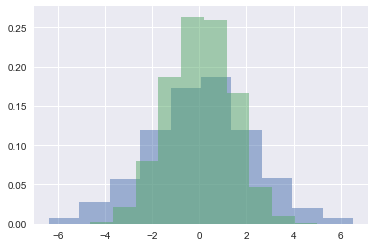

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':  # this is nice
    plt.hist(data[col], normed=True, alpha=0.5)

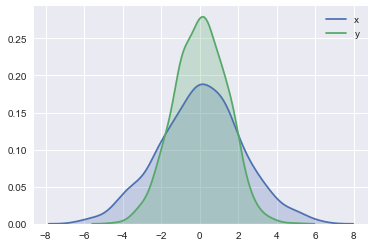

In [10]:
# Rather than a histogram, we can get a smooth estimate
# of the distribution 
# using a kernel density estimation, which Seaborn does with sns.kdeplot

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

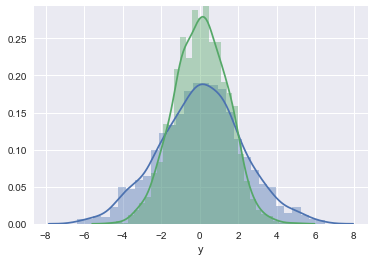

In [11]:
# Hist and KDE can be combined using distplot:
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


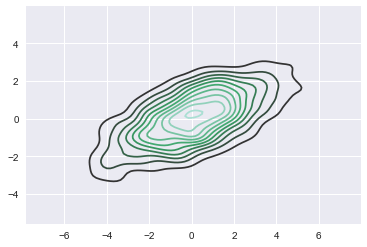

In [14]:
sns.kdeplot(data)

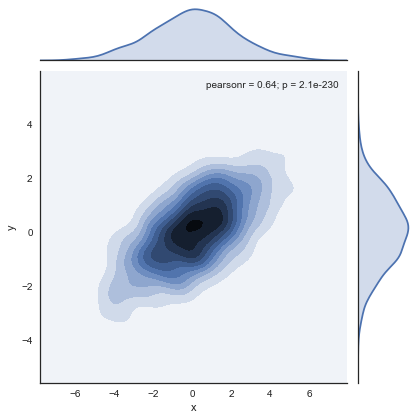

In [15]:
# see the joint distribution and the marginal distributions together
# using sns.jointplot
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

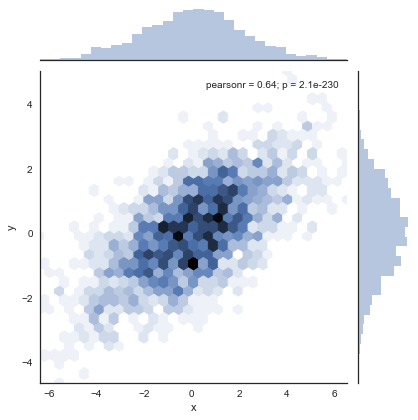

In [16]:
# other paramters to jointplot
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

### Pair plots

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


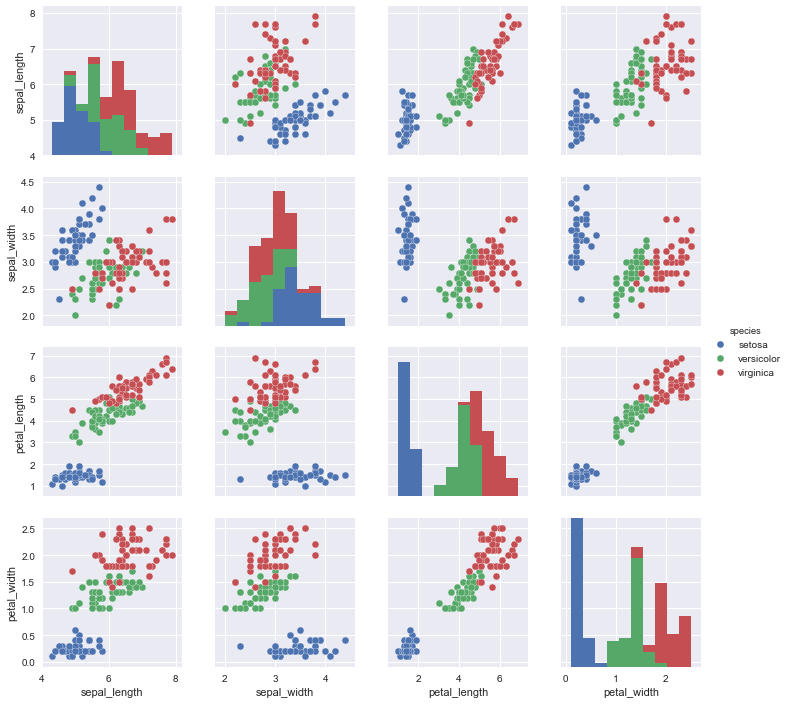

In [18]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


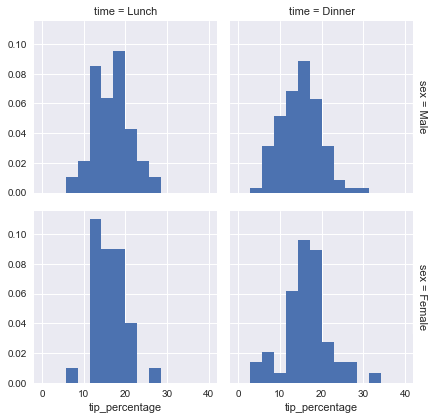

In [28]:
tips.eval('tip_percentage = 100 * tip / total_bill', inplace=True)
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_percentage', bins=np.linspace(0, 40, 15), density=True)

### Factor plots

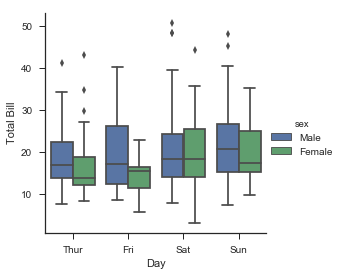

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

### Joint distributions

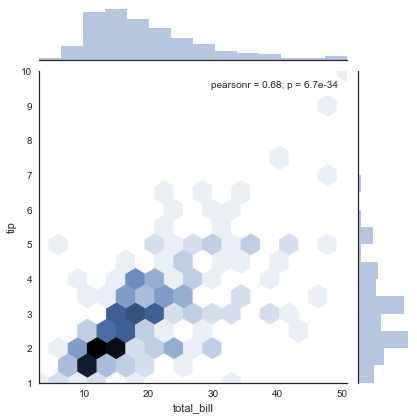

In [32]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

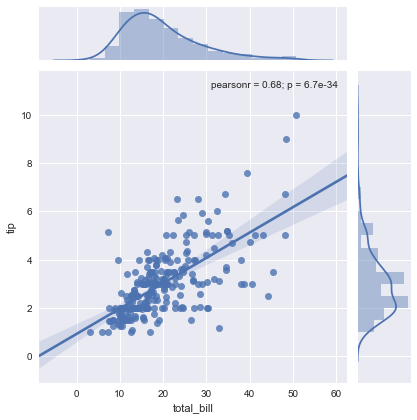

In [33]:
# The joint plot can even do some automatic kernel density estimation 
# and regression
sns.jointplot('total_bill', 'tip', data=tips, kind='reg');

### Bar plots

In [34]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


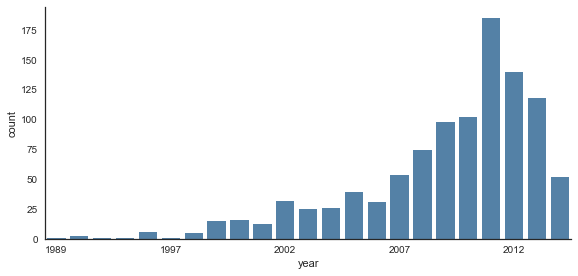

In [36]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2,
                      kind='count', color='steelblue')
    g.set_xticklabels(step=5);

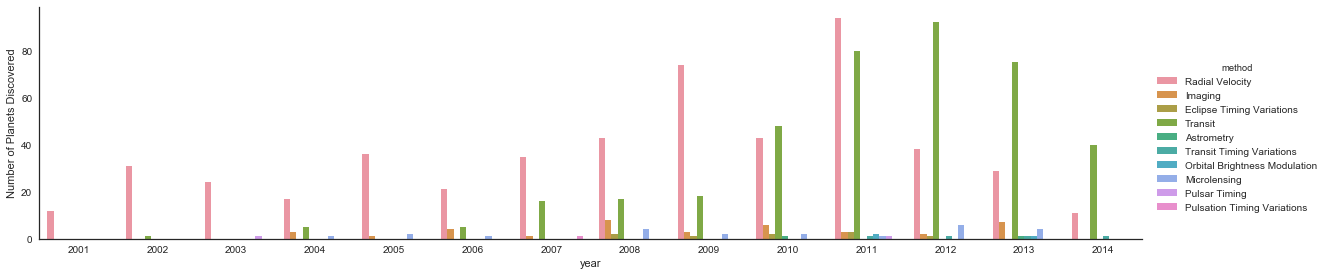

In [37]:
# method of discovery of each of these planets
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4.0, kind='count',
                      hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

In [38]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  836k  100  836k    0     0  1919k      0 --:--:-- --:--:-- --:--:-- 1919k


In [2]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [72]:
# Pandas loaded the time columns as Python strings (type object)
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [3]:
# Coverter  (全是知识点)

def convert_time(s):
    h, m, s, = map(int, s.split(':'))
    return h*3600 + m*60 + s

#### map function

Init signature: `map(self, /, *args, **kwargs)`
    
Docstring: `map(func, *iterables) --> map object`

Make an iterator that computes the function using arguments from
each of the iterables.  

Stops when the shortest iterable is exhausted.

In [4]:
data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

In [70]:
data.head()

,age,gender,split,final
0,33,M,3938,7731
1,32,M,3986,7768
2,31,M,4009,7842
3,38,M,3976,8025
4,31,M,3992,8039


In [5]:
data['split_sec'] = data['split']
data['final_sec'] = data['final']

In [77]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,3938,7731,3938,7731
1,32,M,3986,7768,3986,7768
2,31,M,4009,7842,4009,7842
3,38,M,3976,8025,3976,8025
4,31,M,3992,8039,3992,8039


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


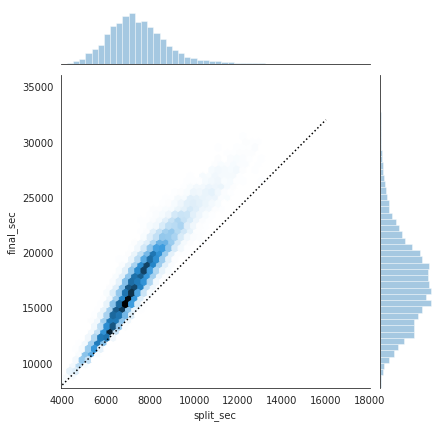

In [6]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

    # most people slow down over the course of the marathon

In [8]:
# split fraction, the degree to which each runner negative-splits or positive-splits the race
data.eval('split_frac = 1 - 2 * split_sec/final_sec', inplace=True) 
data.head()
# negative < 0

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,3938,7731,3938,7731,-0.018756
1,32,M,3986,7768,3986,7768,-0.026262
2,31,M,4009,7842,4009,7842,-0.022443
3,38,M,3976,8025,3976,8025,0.009097
4,31,M,3992,8039,3992,8039,0.006842


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


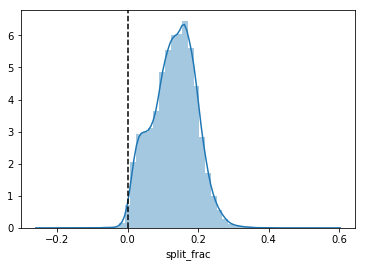

In [14]:
sns.distplot(data.loc[:, 'split_frac'], kde=True);
plt.axvline(0, color='k', ls='--')

In [15]:
sum(data.split_frac<0)

251

In [ ]:
# check out correlation between split fraction and other variables.

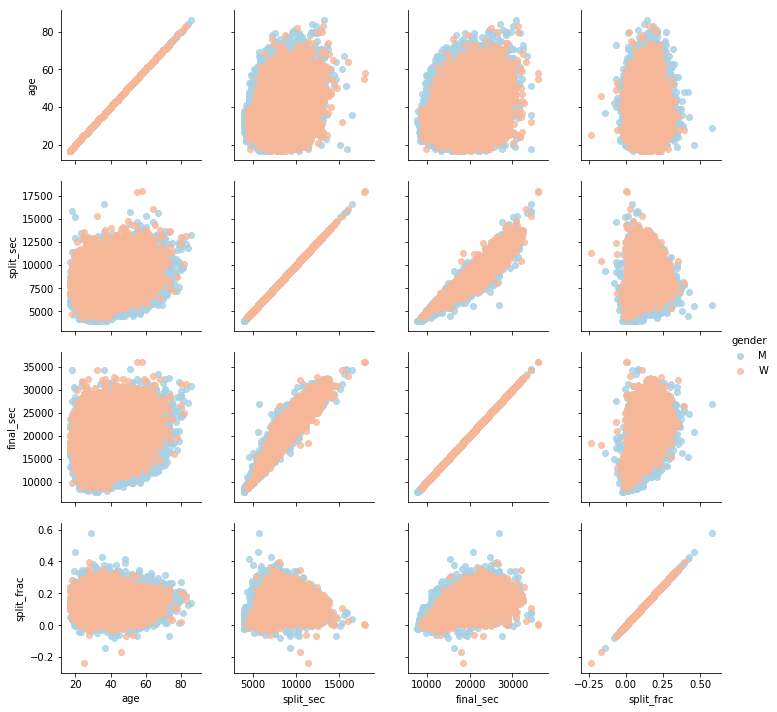

In [16]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], 
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# faster runners tend to have closer to even splits on their marathon time.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'split_frac')

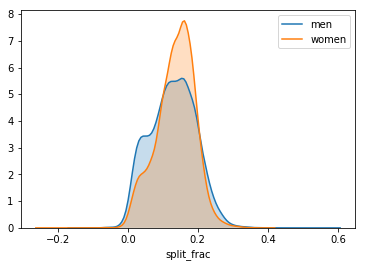

In [17]:
# Histogram of split frac on gender
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

# there are many more men than women who are running close to an even split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


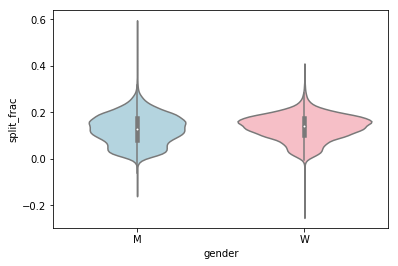

In [18]:
sns.violinplot("gender", "split_frac", data=data,
              palette=["lightblue", "lightpink"])

In [19]:
# violin plots as a function of age
data['age_dec'] = data.age.map(lambda age: 10 * (age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,3938,7731,3938,7731,-0.018756,30
1,32,M,3986,7768,3986,7768,-0.026262,30
2,31,M,4009,7842,4009,7842,-0.022443,30
3,38,M,3976,8025,3976,8025,0.009097,30
4,31,M,3992,8039,3992,8039,0.006842,30


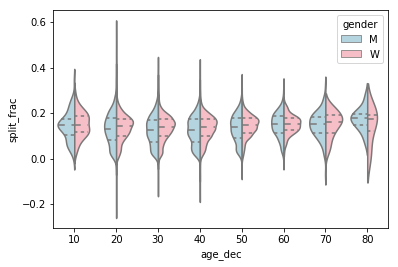

In [20]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data,
                  split=True, inner='quartile',
                  palette=['lightblue', 'lightpink']);
    
# the split distributions of men in their 20s to 50s show a pronounced over-density toward
# lower splits when compared to women of the same age (or of any age, for that matter)

In [21]:
(data.age> 80).sum()

7

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


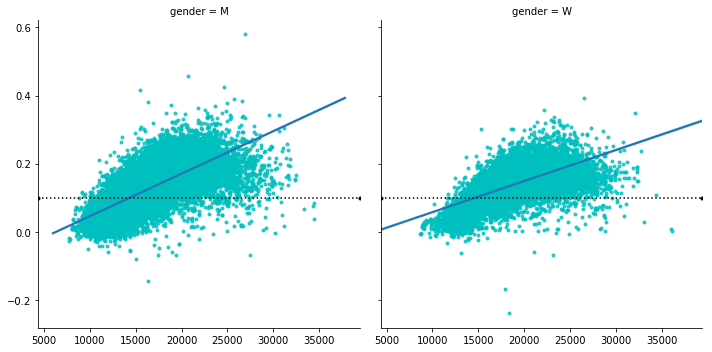

In [22]:
# who are these runners? Does this split fraction correlate with finishing quickly?
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
              markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':')

Apparently the people with fast splits are the elite runners who are finishing within
~15,000 seconds, or about 4 hours. People slower than that are much less likely to
have a fast second split.

# Other Python Graphics Libraries
<img src="files/pylib.png">